In [11]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import random

In [2]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [3]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-2.284489,0.974776,0.501363,-1.978849,-2.051690,1
1,1.742004,-0.387336,0.541847,2.777330,-0.920441,0
2,0.267708,1.688635,1.794482,-0.293814,-1.547757,0
3,-0.097483,-1.716639,0.485967,-3.919227,0.772011,0
4,-2.056241,0.834767,-1.780328,1.003002,-0.479719,1


In [4]:
# function for row sampling

def sample_rows(df,percent):
    return df.sample(int(percent*df.shape[0]),replace=True)

In [12]:
# function for feature sampling

def sample_features(df,percent):
    cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
    new_df = df[cols]
    new_df['target'] = df['target']
    return new_df

In [13]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
    new_df = sample_rows(df,row_percent)
    return sample_features(new_df,col_percent)

In [14]:
df1 = combined_sampling(df,0.5,0.5)

C:\Users\HP\AppData\Local\Temp\ipykernel_8676\1158166936.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [15]:
df2 = combined_sampling(df,0.5,0.5)

C:\Users\HP\AppData\Local\Temp\ipykernel_8676\1158166936.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [16]:
df3 = combined_sampling(df,0.5,0.5)

C:\Users\HP\AppData\Local\Temp\ipykernel_8676\1158166936.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [17]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col4', 'col2', 'target'], dtype='object')
Index(['col5', 'col3', 'target'], dtype='object')
Index(['col2', 'col4', 'target'], dtype='object')


In [18]:
df2

,col5,col3,target
56,3.898470,-0.325016,1
21,2.864771,0.154927,1
95,-1.893933,-0.909444,1
58,1.360610,0.195208,1
11,-1.068852,-0.381196,1
99,1.346939,0.586567,1
54,-2.760362,3.462895,0
53,-1.231394,0.247462,0
69,0.822898,-1.969428,0
14,-2.154910,0.081953,0


In [19]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [20]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [21]:
from sklearn.tree import plot_tree

[Text(0.6333333333333333, 0.9375, 'x[0] <= 0.809\ngini = 0.499\nsamples = 50\nvalue = [24, 26]'),
 Text(0.4, 0.8125, 'x[1] <= 2.346\ngini = 0.337\nsamples = 28\nvalue = [22, 6]'),
 Text(0.26666666666666666, 0.6875, 'x[1] <= 1.517\ngini = 0.219\nsamples = 24\nvalue = [21, 3]'),
 Text(0.2, 0.5625, 'x[1] <= 1.293\ngini = 0.305\nsamples = 16\nvalue = [13, 3]'),
 Text(0.13333333333333333, 0.4375, 'x[1] <= 0.526\ngini = 0.231\nsamples = 15\nvalue = [13, 2]'),
 Text(0.06666666666666667, 0.3125, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.2, 0.3125, 'x[0] <= -0.617\ngini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(0.13333333333333333, 0.1875, 'x[0] <= -2.851\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.06666666666666667, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2, 0.0625, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.26666666666666666, 0.1875, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.26666666666666666, 0.4375, 'gini = 0.0\nsamples = 1\nval

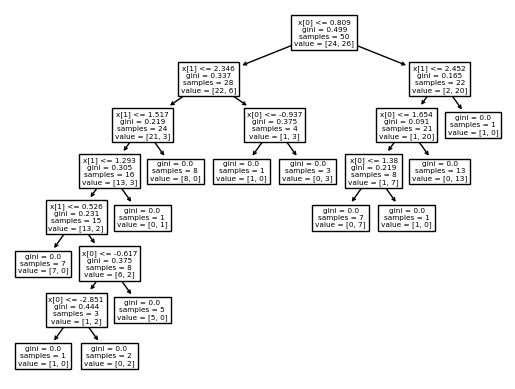

In [22]:
plot_tree(clf1)

[Text(0.7272727272727273, 0.9375, 'x[1] <= 1.03\ngini = 0.497\nsamples = 50\nvalue = [23, 27]'),
 Text(0.6363636363636364, 0.8125, 'x[0] <= 0.964\ngini = 0.394\nsamples = 37\nvalue = [10, 27]'),
 Text(0.5454545454545454, 0.6875, 'x[0] <= -0.43\ngini = 0.473\nsamples = 26\nvalue = [10, 16]'),
 Text(0.2727272727272727, 0.5625, 'x[1] <= -0.742\ngini = 0.388\nsamples = 19\nvalue = [5, 14]'),
 Text(0.18181818181818182, 0.4375, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.36363636363636365, 0.4375, 'x[1] <= 0.309\ngini = 0.486\nsamples = 12\nvalue = [5, 7]'),
 Text(0.2727272727272727, 0.3125, 'x[1] <= 0.015\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.18181818181818182, 0.1875, 'x[1] <= -0.478\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.09090909090909091, 0.0625, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.2727272727272727, 0.0625, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.36363636363636365, 0.1875, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(

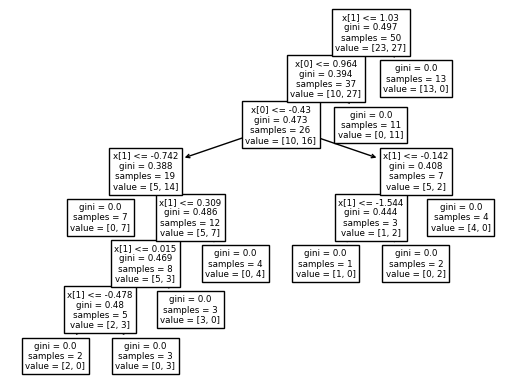

In [23]:
plot_tree(clf2)

[Text(0.5, 0.9285714285714286, 'x[1] <= 0.811\ngini = 0.5\nsamples = 50\nvalue = [25, 25]'),
 Text(0.25, 0.7857142857142857, 'x[0] <= 2.848\ngini = 0.211\nsamples = 25\nvalue = [22, 3]'),
 Text(0.16666666666666666, 0.6428571428571429, 'x[0] <= 0.923\ngini = 0.153\nsamples = 24\nvalue = [22, 2]'),
 Text(0.08333333333333333, 0.5, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.25, 0.5, 'x[0] <= 1.026\ngini = 0.26\nsamples = 13\nvalue = [11, 2]'),
 Text(0.16666666666666666, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3333333333333333, 0.35714285714285715, 'x[1] <= -0.188\ngini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(0.25, 0.21428571428571427, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.4166666666666667, 0.21428571428571427, 'x[1] <= 0.097\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.3333333333333333, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.07142857142857142, 'gini = 0.0\nsamples = 3\nvalue = 

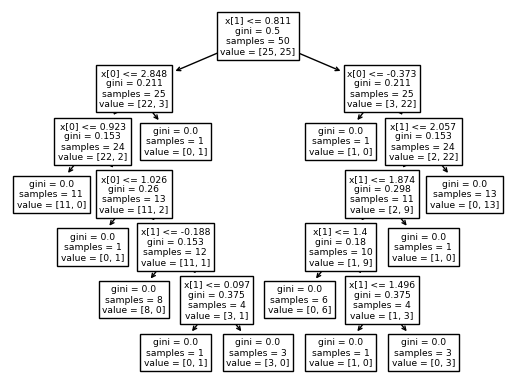

In [24]:
plot_tree(clf3)

In [25]:
clf1.predict(np.array([-1.042498,-0.064323]).reshape(1,2))

C:\Users\HP\anaconda3\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [26]:
clf2.predict(np.array([-1.042498,-0.064323]).reshape(1,2))

C:\Users\HP\anaconda3\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [28]:
clf3.predict(np.array([-1.042498,-0.064323]).reshape(1,2))

C:\Users\HP\anaconda3\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])